# Strucutral data Analysis of LTR Retrotransposons

In [1]:

#Reading the fasta file and getting the LTR retrotransposons

import dataReaderFASTASeondVersion as dr
import matplotlib.pyplot as plt
import seaborn as sns

trasnposons = dr.getGenes("./DBFinal_plunatus.fa")
ltrs = dr.getLTRTransposons(trasnposons)
noLTRS = dr.getNoLTRTransposons(trasnposons)
complete = trasnposons

print(len(trasnposons),len(ltrs) )




20000 9610


In [2]:
# We get extreme sequences of each LTR to compare them through pairwise alignment

repeatedLenght = 250# Goes from 250 to 600 bp
def getExtremeSequence(genes):
    return [genes[0:repeatedLenght], genes[-repeatedLenght:]]


def multipleExtremes(genes):
    extremes = {}
    for t in genes: 
        extremes[t] = getExtremeSequence(genes[t])
    return extremes


extremesLTRS = multipleExtremes(ltrs)

extremesNoLTRS = multipleExtremes(noLTRS)
extremesComplete = multipleExtremes(complete)




TE57#LTR/TRIM

TE66#LTR/TRIM

TE69#LTR/TRIM

TE70#LTR/TRIM

TE102#LTR/TRIM

TE109#LTR/TRIM

TE115#LTR/TRIM

TE117#LTR/TRIM

TE131#LTR/TRIM

TE142#LTR/TRIM

TE161#LTR/TRIM

TE163#LTR/TRIM

TE188#LTR/TRIM

TE196#LTR/TRIM

TE208#LTR/TRIM

TE214#LTR/TRIM

TE257#LTR/TRIM

TE261#LTR/TRIM

TE265#LTR/TRIM

TE266#LTR/TRIM

TE270#LTR/TRIM

TE281#LTR/TRIM

TE284#LTR/TRIM

TE285#LTR/TRIM

TE322#LTR/TRIM

TE329#LTR/TRIM

TE345#LTR/TRIM

TE365#LTR/TRIM

TE367#LTR/TRIM

TE382#LTR/TRIM

TE445#LTR/TRIM

TE446#LTR/TRIM

TE472#LTR/TRIM

TE481#LTR/TRIM

TE523#LTR/TRIM

TE550#LTR/TRIM

TE570#LTR/TRIM

TE619#LTR/TRIM

TE625#LTR/TRIM

TE653#LTR/TRIM

TE659#LTR/TRIM

TE660#LTR/TRIM

TE674#LTR/TRIM

TE724#LTR/TRIM

TE782#LTR/TRIM

TE789#LTR/TRIM

TE793#LTR/TRIM

TE798#LTR/TRIM

TE851#LTR/TRIM

TE896#LTR/TRIM

TE934#LTR/TRIM

TE935#LTR/TRIM

TE938#LTR/TRIM

TE990#LTR/TRIM

TE1091#LTR/TRIM

TE1092#LTR/TRIM

TE1098#LTR/TRIM

TE1099#LTR/TRIM

TE1125#LTR/TRIM

TE1319#LTR/TRIM

TE1342#LTR/TRIM

TE1439#LTR/TRIM

TE14

<Axes: ylabel='Count'>

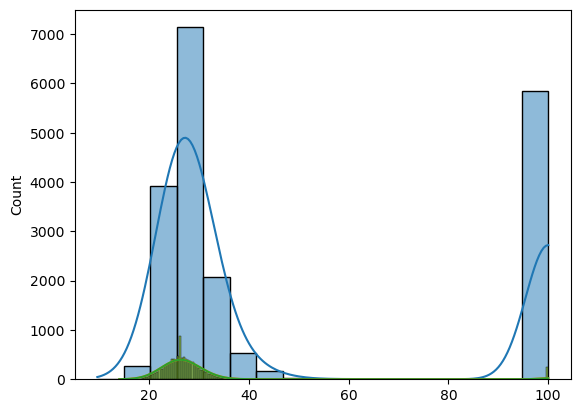

In [3]:
import CuadraticScoreMatrix as alignment
import scoringMatrix as sm
import numpy as np


#Initially we compare the extremes of the LTRs to see if they are similar

#We get real matches between the extremes of the LTRs

def getTotalPercentageMatches(extreme1, extreme2,repeatedLenght):
    realMatch = 0
    for i in range (0, repeatedLenght): 
        if extreme1[i] == extreme2[i]:
            realMatch += 1
    return [(realMatch/repeatedLenght)*100,(1-(realMatch/repeatedLenght))*100]
def getMatches(extremes):#Extrems bein the dictionary with two extremes of each LTR

    #dataPoints = np.linspace(0,len(extremes),len(extremes))

    dictMatches = {}
    matchPercentage = []
    mismatchPercentage = []
    for name in extremes: 
        extreme1 = extremes[name][0]
        extreme2= extremes[name][1]

        realMatchPercentage, realUnmatchPercentage = getTotalPercentageMatches(extreme1, extreme2,len(extreme1))
        if realMatchPercentage>80: 
            print(name)
        

        """extremes[name].append(realMatch)
        extremes[name].append(repeatedLenght-realMatch)"""
        dictMatches[name] = [realMatchPercentage, realUnmatchPercentage]
        matchPercentage.append(realMatchPercentage)
        mismatchPercentage.append(realUnmatchPercentage)

    return dictMatches

dictRealMatchesLTR = getMatches(extremesLTRS)
dictRealMatchesNoLTR = getMatches(extremesNoLTRS)
dictRealMatchesComplete = getMatches(extremesComplete)

#print(len(dataPoint), len(matchPercentage))
#plt.scatter(dataPoint, matchPercentage, label = "Real matches")
fig=  plt.figure()

def getRealMatchesUnmatchesList(dict):

    realMatch = []
    realUnmatch = []
    for name in dict: 
        realMatch.append(dict[name][0])
        realUnmatch.append(dict[name][1])
    return realMatch, realUnmatch

realMatchLTR, realUnmatchLTR = getRealMatchesUnmatchesList(dictRealMatchesLTR)
realMatchNoLTR, realUnmatchNoLTR = getRealMatchesUnmatchesList(dictRealMatchesNoLTR)
realMatchComplete, realUnmatchComplete = getRealMatchesUnmatchesList(dictRealMatchesComplete)


#fig=  plt.figure()
sns.histplot(realMatchComplete, kde = True)
sns.histplot(realMatchNoLTR, kde = True)
sns.histplot(realMatchLTR, kde = True)
#fig=  plt.figure()
#sns.histplot(realMismatch, kde = True)




In [4]:


def getAlignedMatches(extremes,matrix):

    alignments = {}
    alignedExtremes = {}
    alignedMatches = {}
    i=0
    for t in extremes:
        print(i)
        i+=1
        alignments[t] = alignment.pairwiseSequencing(extremes[t][0], extremes[t][1],matrix)
        alignedExtremes[t] = [alignments[t][3], alignments[t][4]]
        alignedMatches[t]=[(alignments[t][0]/repeatedLenght)*100,(1-(alignments[t][0]/repeatedLenght))*100]
        print(getTotalPercentageMatches(alignments[t][3],alignments[t][4],len(alignments[t][3]))[0],(alignments[t][0]/repeatedLenght)*100,t)
        #print(alignments[t][0])
        #print(alignedMatches)

        """print(t[:3],alignments[t][0])
        print(alignments[t][2],len(alignments[t][2]))
        print(alignments[t][3])
        print(alignments[t][4])"""
        if (i>1001):
            break
    return alignedMatches, alignedExtremes, alignments

#print(alignments)

In [5]:


def getAlignedLocalMatches(extremes,matrix):

    alignments = {}
    alignedExtremes = {}
    alignedMatches = {}
    for t in extremes: 
        alignments[t] = alignmentLocal.pairwiseSequencing(extremes[t][0], extremes[t][1],matrix)
        alignedExtremes[t] = [alignments[t][3], alignments[t][4]]
        alignedMatches[t]=[(alignments[t][0]/repeatedLenght)*100,(1-(alignments[t][0]/repeatedLenght))*100]
        print(getTotalPercentageMatches(alignments[t][3],alignments[t][4],len(alignments[t][3]))[0],(alignments[t][0]/repeatedLenght)*100,t)
        #print(alignments[t][0])
        #print(alignedMatches)

        """print(t[:3],alignments[t][0])
        print(alignments[t][2],len(alignments[t][2]))
        print(alignments[t][3])
        print(alignments[t][4])"""
    return alignedMatches, alignedExtremes, alignments



In [6]:
matrix = sm.matrix(4,1,0,0)


In [11]:
import localAlignment as la



def getAlignedLocal(extremes):
    i=0
    alignedMatches = []
    for t in extremes: 
        seq1 = extremes[t][0]
        seq2 =extremes[t][1]
        sim_tup = la.main(seq1,seq2)
        sim_tup=sim_tup[1]
        print(sim_tup)
        alignedMatches.append(sim_tup)
        i+=1
        if (i>1001):
            break
        print(i)
    return alignedMatches




listSimilarity = getAlignedLocal(extremesLTRS)

TATTAAAGGAAAAGAAAGAATAGGGTAAATCCCTTGTGTATATTGAACACATAGGGTTATGTTTATATAAGAAAAATAAACATATGGGCTAAGCCCATTACATAAATATGAAATATAAAACAATAACTATAATATCTCATAATATCTAATAATATCTAACA
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
TATTAAAGGAAAAGAAAGAATAGGGTAAATCCCTTGTGTATATTGAACACATAGGGTTATGTTTATATAAGAAAAATAAACATATGGGCTAAGCCCATTACATAAATATGAAATATAAAACAATAACTATAATATCTCATAATATCTAATAATATCTAACA
1.0
1
AAAGATTTTGTTAACACTTGTGCAAGTTGATTATTGGATCCGACAAA_CTTAGTACAAATTTCCTTGGACAACAA
**||||*|*||||**|*|*|||*||**|*||*|*|***||**||||**|||**||*|****||*|||||*||*||
__AGATCTAGTTAGTAATAGTGAAAT_TAATAAATTTCTCA_ACAAGTCTTC_TATATC__TCTTTGGATAAAAA
0.5866666666666667
2
AAAGGAATTATGTT_CAAACAAAATGCGAATGTAA
||||||**|||**|*||****|**||*|||||*||
AAAGGAT_TATT_TCCA____AGCTGGGAATGGAA
0.6285714285714286
3
CGAAA_TAAAACCAAA_ATACAGCATAAAA_AGAAA_ACAGGCGATCTCTTCCTC_CA
|||*|*||||||*****||***|*|*|*||*|**||*||*|||||||*|*||**|*||
CGACACTAAAAC

<Axes: ylabel='Count'>

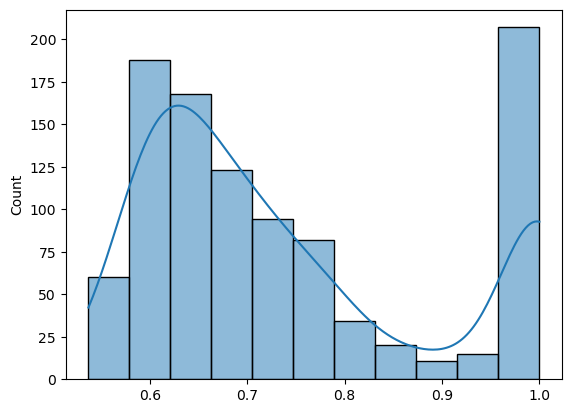

In [12]:
fig=  plt.figure()
sns.histplot(listSimilarity, kde = True)

In [ ]:

ltrAlignementsMatch = getAlignedMatches(extremesLTRS,matrix)
alignedMatchesLTR,alignedUnMatchesLTR = getRealMatchesUnmatchesList(ltrAlignementsMatch[0])
    


0
48.367952522255194 65.2 TE3#LTR/Copia/ALE-RETROFIT

1
50.62893081761006 64.4 TE6#LTR/Copia

2
51.7799352750809 64.0 TE9#LTR/Copia/ALE-RETROFIT

3
50.324675324675326 62.0 TE13#LTR/Gypsy/TEKAY-DEL

4
53.442622950819676 65.2 TE14#LTR/Gypsy/TEKAY-DEL

5
65.01650165016501 78.8 TE29#LTR/Copia/IVANA-ORYCO

6
57.23684210526315 69.6 TE36#LTR/TRIM

7
53.896103896103895 66.4 TE54#LTR/Gypsy/TEKAY-DEL

8
50.798722044728436 63.6 TE55#LTR/Gypsy

9
100.0 95.6 TE57#LTR/TRIM

10
53.59477124183007 65.60000000000001 TE58#LTR/Copia

11
54.0453074433657 66.8 TE61#LTR/Copia/ALE-RETROFIT

12
100.0 41.6 TE66#LTR/TRIM

13
100.0 93.60000000000001 TE69#LTR/TRIM

14
100.0 47.199999999999996 TE70#LTR/TRIM

15
53.135313531353134 64.4 TE76#LTR/TRIM

16
52.4390243902439 68.8 TE77#LTR/TRIM

17
52.78688524590164 64.4 TE79#LTR/Gypsy/TAT

18
53.72168284789643 66.4 TE80#LTR/Gypsy/TAT

19
54.248366013071895 66.4 TE97#LTR/TRIM

20
100.0 47.599999999999994 TE102#LTR/TRIM

21
46.48318042813456 60.8 TE105#LTR/Gypsy/REINA

22


<Axes: ylabel='Count'>

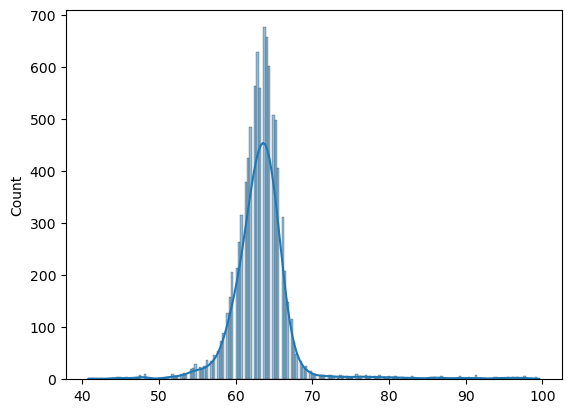

In [ ]:
fig=  plt.figure()
sns.histplot(alignedMatchesLTR, kde = True)

In [ ]:
NoltrAlignementsMatch = getAlignedMatches(extremesNoLTRS,matrix)
alignedMatchesNoLTR,alignedUnMatchesNoLTR = getRealMatchesUnmatchesList(NoltrAlignementsMatch[0])
    
fig=  plt.figure()
sns.histplot(alignedMatchesNoLTR, kde = True)


0
48.367952522255194 65.2 TE3#LTR/Copia/ALE-RETROFIT

1
50.62893081761006 64.4 TE6#LTR/Copia

2
51.7799352750809 64.0 TE9#LTR/Copia/ALE-RETROFIT

3
50.324675324675326 62.0 TE13#LTR/Gypsy/TEKAY-DEL

4
53.442622950819676 65.2 TE14#LTR/Gypsy/TEKAY-DEL

5
65.01650165016501 78.8 TE29#LTR/Copia/IVANA-ORYCO

6
57.23684210526315 69.6 TE36#LTR/TRIM

7
53.896103896103895 66.4 TE54#LTR/Gypsy/TEKAY-DEL

8
50.798722044728436 63.6 TE55#LTR/Gypsy

9
100.0 95.6 TE57#LTR/TRIM

10
53.59477124183007 65.60000000000001 TE58#LTR/Copia

11
54.0453074433657 66.8 TE61#LTR/Copia/ALE-RETROFIT

12
100.0 41.6 TE66#LTR/TRIM

13
100.0 93.60000000000001 TE69#LTR/TRIM

14
100.0 47.199999999999996 TE70#LTR/TRIM

15
53.135313531353134 64.4 TE76#LTR/TRIM

16
52.4390243902439 68.8 TE77#LTR/TRIM

17
52.78688524590164 64.4 TE79#LTR/Gypsy/TAT

18
53.72168284789643 66.4 TE80#LTR/Gypsy/TAT

19
54.248366013071895 66.4 TE97#LTR/TRIM

20
100.0 47.599999999999994 TE102#LTR/TRIM

21
46.48318042813456 60.8 TE105#LTR/Gypsy/REINA

22


KeyboardInterrupt: 

In [ ]:
CompleteAlignementsMatch = getAlignedMatches(extremesComplete,matrix)
alignedMatchesComplete,alignedUnMatchesComplete= getRealMatchesUnmatchesList(CompleteAlignementsMatch[0])
fig=  plt.figure()
sns.histplot(alignedMatchesComplete, kde = True)

100.0 68.0 TE1#MITE/DTA

100.0 81.2 TE2#DNA/hAT

48.367952522255194 65.2 TE3#LTR/Copia/ALE-RETROFIT

100.0 58.8 TE4#DNA/DTC

100.0 68.4 TE5#DNA/DTT

50.62893081761006 64.4 TE6#LTR/Copia

59.7444089456869 74.8 TE7#DNA/Helitron

59.7444089456869 74.8 TE8#DNA/CACTA

51.7799352750809 64.0 TE9#LTR/Copia/ALE-RETROFIT

100.0 85.2 TE10#DNA/DTM

100.0 82.8 TE11#DNA/DTC

100.0 52.400000000000006 TE12#DNA/DTH

50.324675324675326 62.0 TE13#LTR/Gypsy/TEKAY-DEL

53.442622950819676 65.2 TE14#LTR/Gypsy/TEKAY-DEL

100.0 48.8 TE15#DNA/Helitron

100.0 40.8 TE16#DNA/DTM

100.0 77.60000000000001 TE17#DNA/DTM

71.8213058419244 83.6 TE18#DNA/DTM

75.43859649122807 86.0 TE19#DNA/DTC

100.0 65.2 TE20#LINE

80.22813688212928 84.39999999999999 TE21#DNA/Helitron

100.0 48.0 TE22#DNA/DTC

100.0 57.99999999999999 TE23#DNA/DTC

100.0 88.8 TE24#MITE/DTM

56.14617940199336 67.60000000000001 TE25#DNA/Helitron

100.0 78.8 TE26#DNA/DTM

100.0 78.4 TE27#DNA/DTC

100.0 45.6 TE28#DNA/DTC

65.01650165016501 78.8 TE29#LTR/Cop

KeyboardInterrupt: 

In [ ]:


dictsecondMetric_ltrAlignementsMatch= getMatches(ltrAlignementsMatch[1])
secondMetric_AlignementMatchLTR,secondMetric_AlignementUnMatchLTR =  getRealMatchesUnmatchesList(dictsecondMetric_ltrAlignementsMatch)

dictsecondMetric_NoltrAlignementsMatch= getMatches(NoltrAlignementsMatch[1])
secondMetric_AlignementMatchNoLTR,secondMetric_AlignementUnMatchNoLTR =  getRealMatchesUnmatchesList(dictsecondMetric_NoltrAlignementsMatch)

dictsecondMetric_CompleteAlignementsMatch= getMatches(CompleteAlignementsMatch[1])
secondMetric_AlignementMatchComplete,secondMetric_AlignementUnMatchComplete =  getRealMatchesUnmatchesList(dictsecondMetric_ltrAlignementsMatch)
#secondMetric_completeAlignementsMatch= getMatches(CompleteAlignementsMatch[1])


TE57#LTR/TRIM

TE66#LTR/TRIM

TE69#LTR/TRIM

TE70#LTR/TRIM

TE102#LTR/TRIM

TE109#LTR/TRIM

TE115#LTR/TRIM

TE117#LTR/TRIM

TE131#LTR/TRIM

TE142#LTR/TRIM

TE161#LTR/TRIM

TE163#LTR/TRIM

TE172#LTR/TRIM

TE188#LTR/TRIM

TE196#LTR/TRIM

TE208#LTR/TRIM

TE214#LTR/TRIM

TE257#LTR/TRIM

TE261#LTR/TRIM

TE265#LTR/TRIM

TE266#LTR/TRIM

TE270#LTR/TRIM

TE281#LTR/TRIM

TE284#LTR/TRIM

TE285#LTR/TRIM

TE322#LTR/TRIM

TE329#LTR/TRIM

TE345#LTR/TRIM

TE365#LTR/TRIM

TE367#LTR/TRIM

TE382#LTR/TRIM

TE444#LTR/TRIM

TE445#LTR/TRIM

TE446#LTR/TRIM

TE472#LTR/TRIM

TE481#LTR/TRIM

TE523#LTR/TRIM

TE550#LTR/TRIM

TE570#LTR/TRIM

TE619#LTR/TRIM

TE625#LTR/TRIM

TE653#LTR/TRIM

TE659#LTR/TRIM

TE660#LTR/TRIM

TE674#LTR/TRIM

TE724#LTR/TRIM

TE732#LTR/TRIM

TE782#LTR/TRIM

TE789#LTR/TRIM

TE793#LTR/TRIM

TE798#LTR/TRIM

TE851#LTR/TRIM

TE890#LTR/Copia/ALE-RETROFIT

TE896#LTR/TRIM

TE934#LTR/TRIM

TE935#LTR/TRIM

TE938#LTR/TRIM

TE990#LTR/TRIM

TE1091#LTR/TRIM

TE1092#LTR/TRIM

TE1098#LTR/TRIM

TE1099#LTR/

NameError: name 'NoltrAlignementsMatch' is not defined

<Axes: ylabel='Count'>

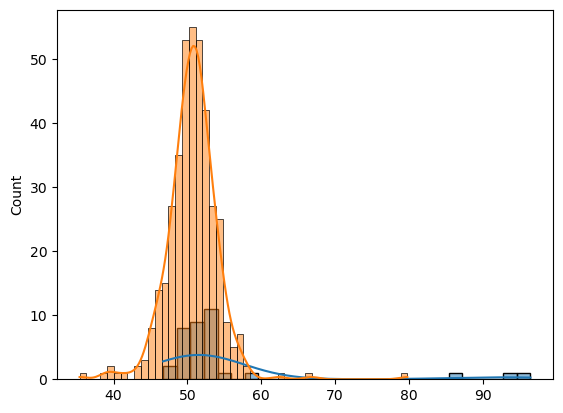

In [ ]:


sns.histplot(secondMetric_AlignementMatchLTR, kde = True)
sns.histplot(secondMetric_AlignementMatchNoLTR, kde = True)
#sns.histplot(secondMetric_AlignementMatchComplete, kde = True)


In [ ]:
"""
sns.histplot(NoltrAlignementsMatch[0], kde = True)
sns.histplot(ltrAlignementsMatch[0], kde = True)
#sns.histplot(CompleteAlignementsMatch[0], kde = True)"""

'\nsns.histplot(NoltrAlignementsMatch[0], kde = True)\nsns.histplot(ltrAlignementsMatch[0], kde = True)\n#sns.histplot(CompleteAlignementsMatch[0], kde = True)'

In [ ]:
# Creacion de dataframe para pasar a power BI

